**TOPIC: DISEASE PREDICTION AND DRUG RECOMMENDATION(AYURVEDIC)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dis_sym_dataset_comb.csv to dis_sym_dataset_comb.csv


In [6]:
df = pd.read_csv("dis_sym_dataset_comb.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Columns: 490 entries, label_dis to yellowish skin crust
dtypes: int64(489), object(1)
memory usage: 33.0+ MB


In [8]:
df.shape

(8835, 490)

In [9]:
df.describe()

,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,acquiring drinking alcohol taking lot time,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
count,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,...,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000
mean,0.000905,0.007244,0.000905,0.001811,0.001811,0.000905,0.028976,0.001811,0.030787,0.001811,...,0.000905,0.001811,0.000226,0.000453,0.001811,0.000453,0.001811,0.000226,0.003169,0.000226
std,0.030079,0.084807,0.030079,0.042519,0.042519,0.030079,0.167748,0.042519,0.172749,0.042519,...,0.030079,0.042519,0.015045,0.021274,0.042519,0.021274,0.042519,0.015045,0.056210,0.015045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

,0
label_dis,0
abdominal cramp,0
abdominal distention,0
abnormal behavior,0
abnormal bleeding,0
...,...
worrying,0
yellow skin,0
yellowish coloration skin white eye,0
yellowish skin,0


In [11]:
data = df.loc[:, df.columns.notna()]

In [12]:
target_variable = ['label_dis']
label = LabelEncoder()
for i in target_variable:
    data[i] = label.fit_transform(data[i])

In [13]:
data.head()

,label_dis,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.columns

Index(['label_dis', 'abdominal cramp', 'abdominal distention',
       'abnormal behavior', 'abnormal bleeding', 'abnormal sensation',
       'abnormally frequent', 'abscess', 'aching', 'acne',
       ...
       'wet', 'wheezing', 'white patch vaginal discharge', 'widespread pain',
       'withdrawal occurring stopping', 'worrying', 'yellow skin',
       'yellowish coloration skin white eye', 'yellowish skin',
       'yellowish skin crust'],
      dtype='object', length=490)

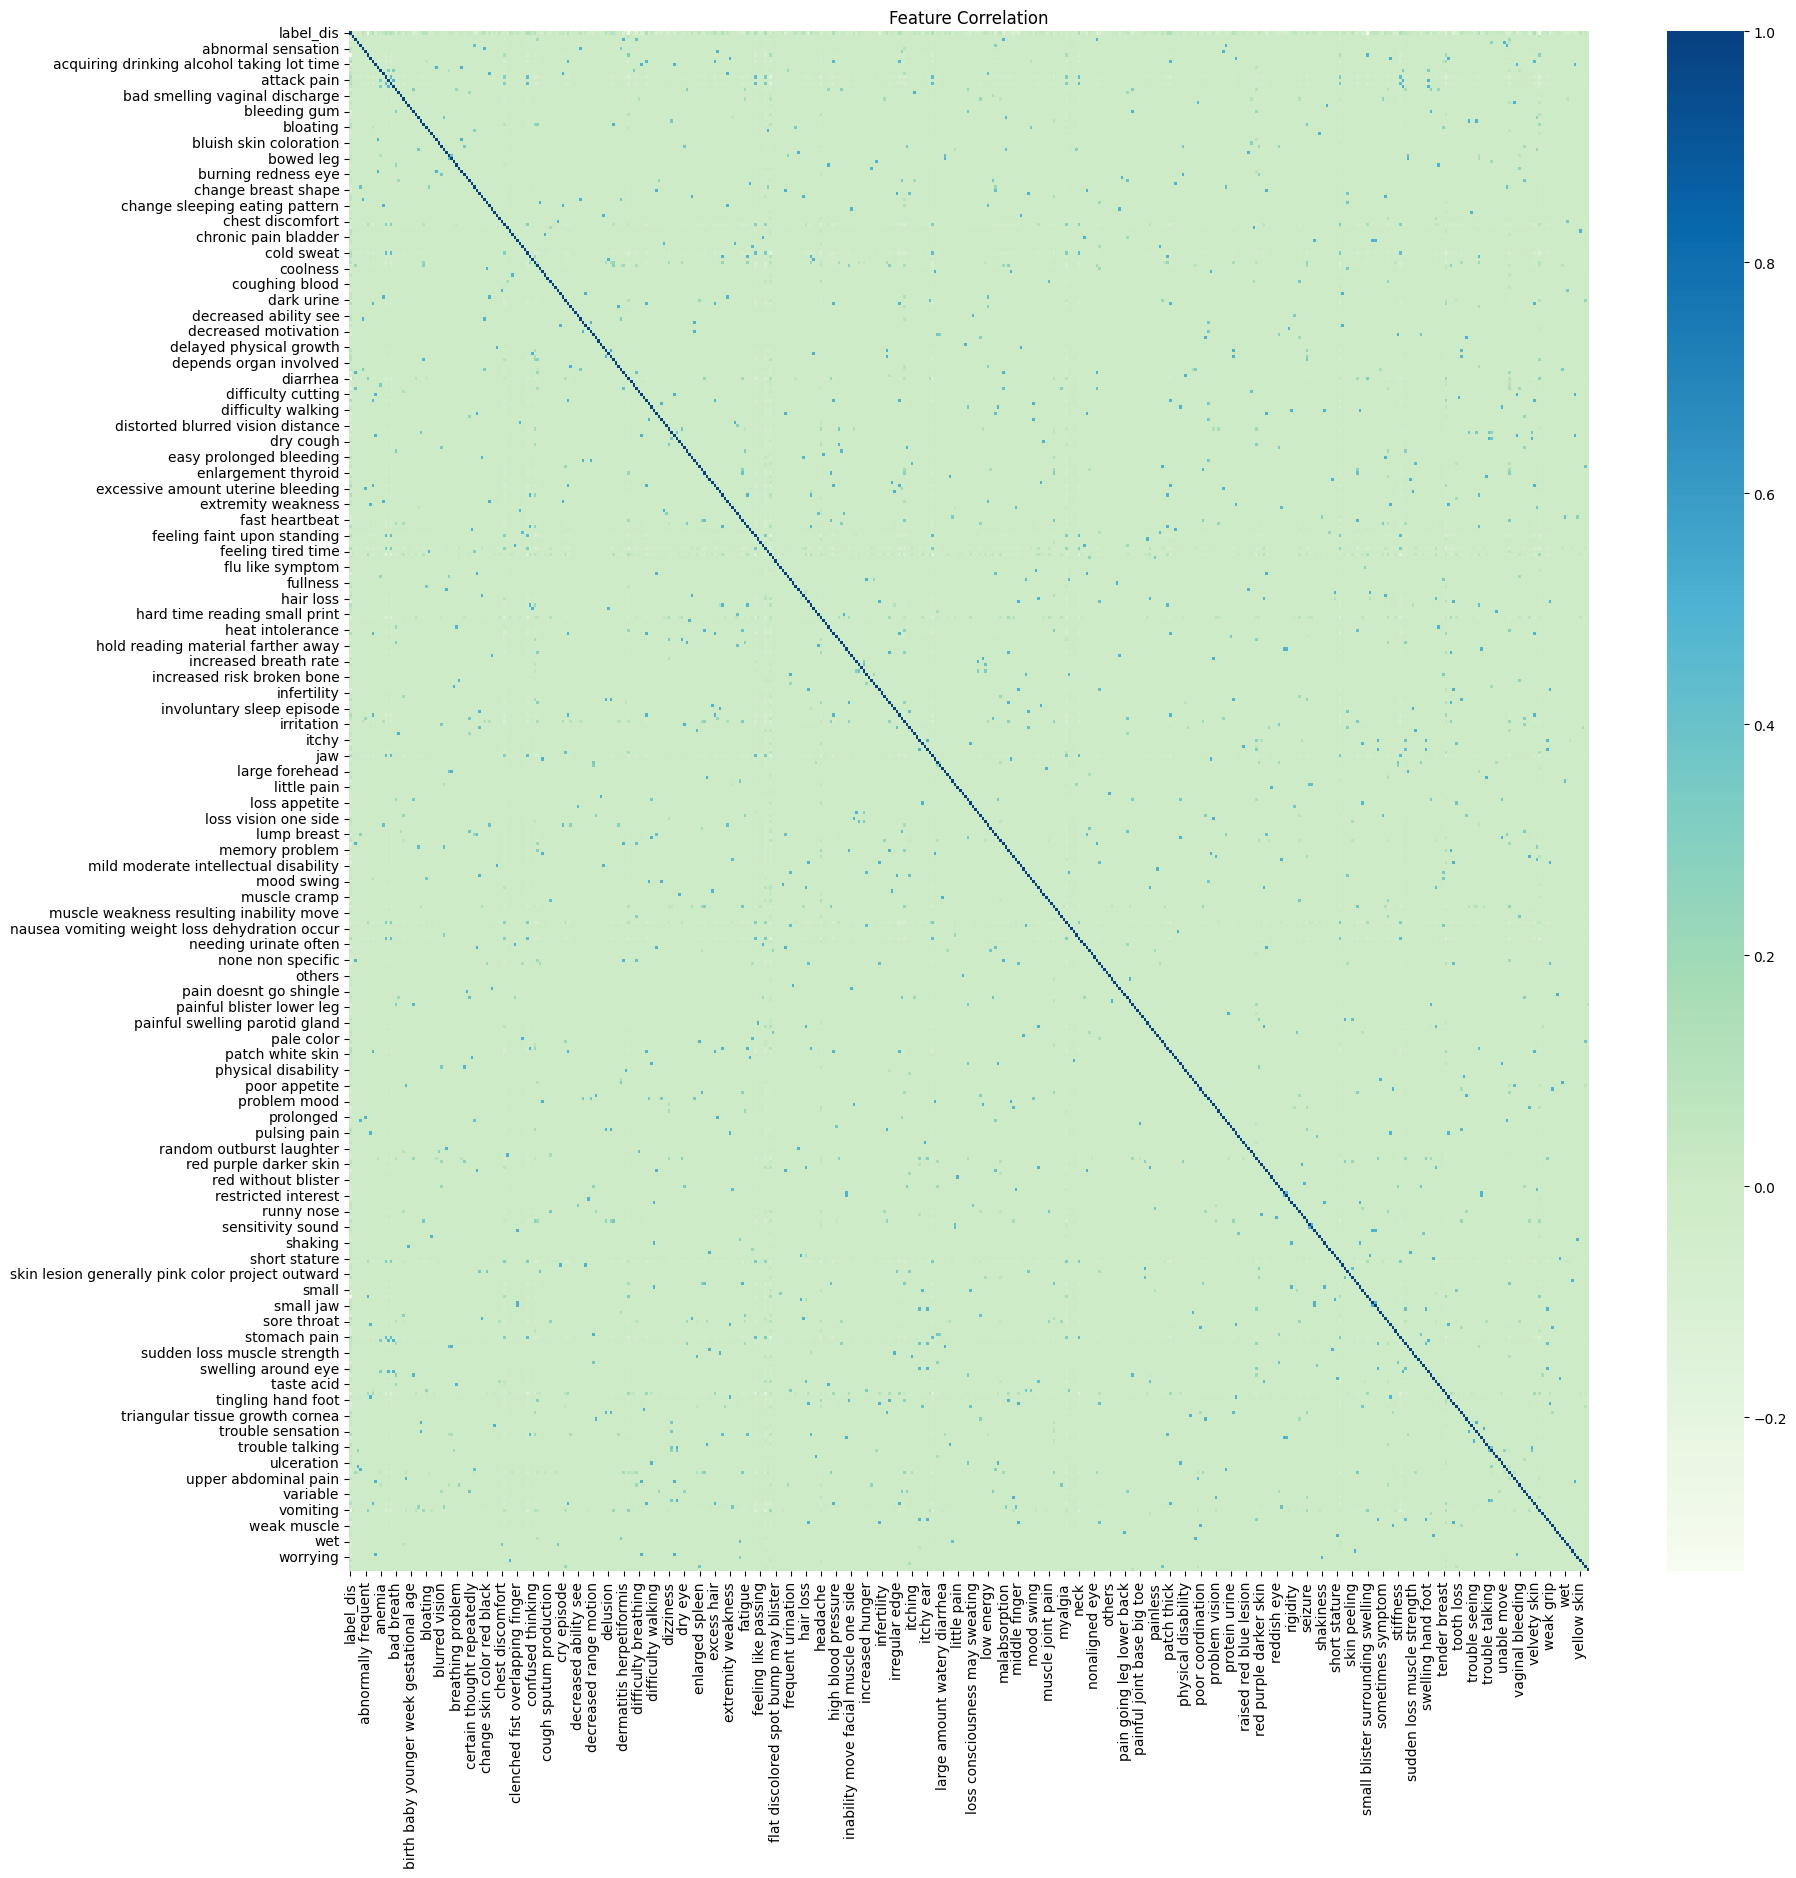

In [17]:
plt.figure(figsize=(20,20))
correlation = data.corr()
sns.heatmap(correlation,cmap="GnBu")
plt.title("Feature Correlation")
plt.show()

Enter the disease you want: yellow skin


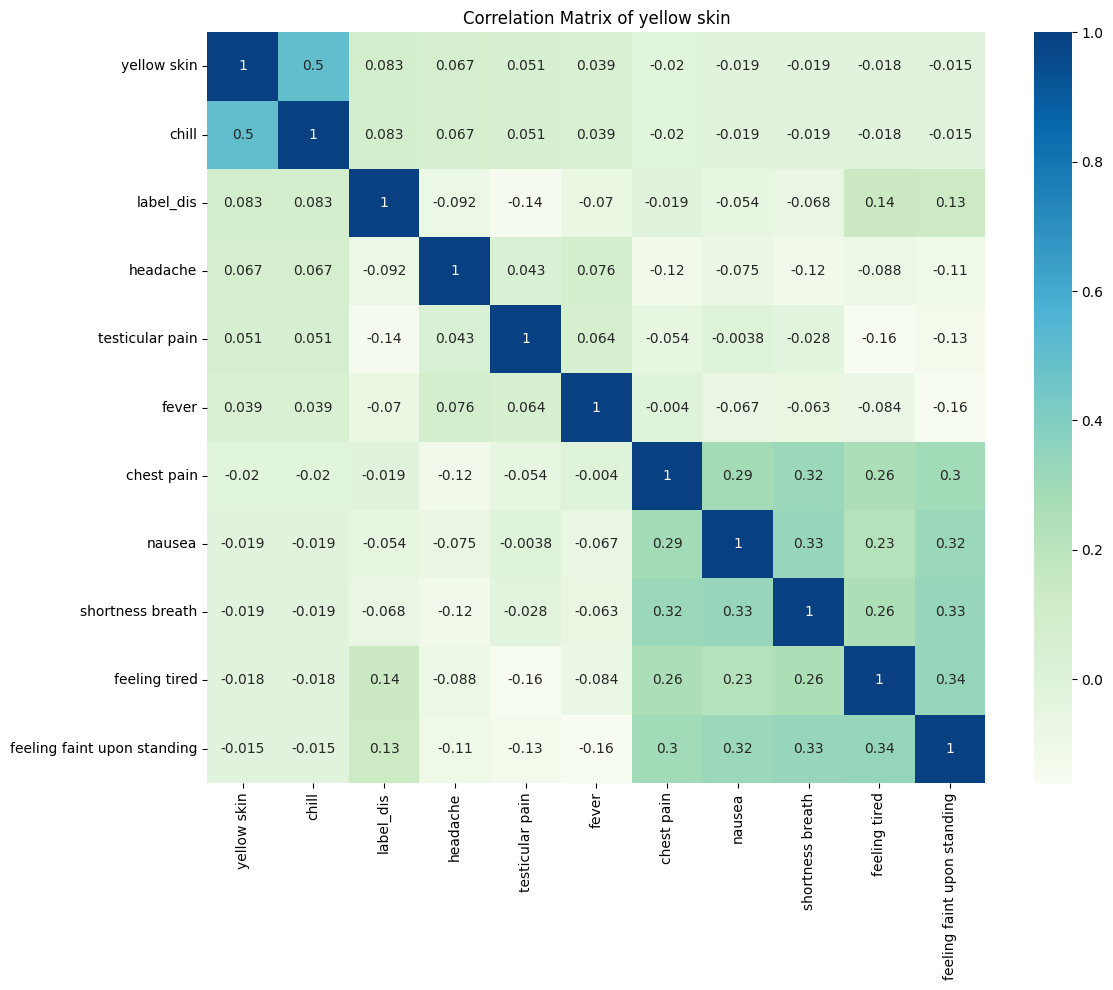

In [18]:
plt.figure(figsize=(12,10))
dis = input("Enter the disease you want: ")

tc = data.corr()[dis].abs().nlargest(11).index
sd = data[tc]
correlation = sd.corr()
sns.heatmap(correlation, cmap="GnBu", annot=True)
plt.title(f"Correlation Matrix of {dis}")
plt.tight_layout()
plt.show()

In [19]:
X = data.drop(columns="label_dis")
y = data['label_dis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_predict1 = model1.predict(X_test)
ac1 = accuracy_score(y_test, y_predict1)
print("Accuracy : ", ac1*100)

Accuracy :  81.43746462931523


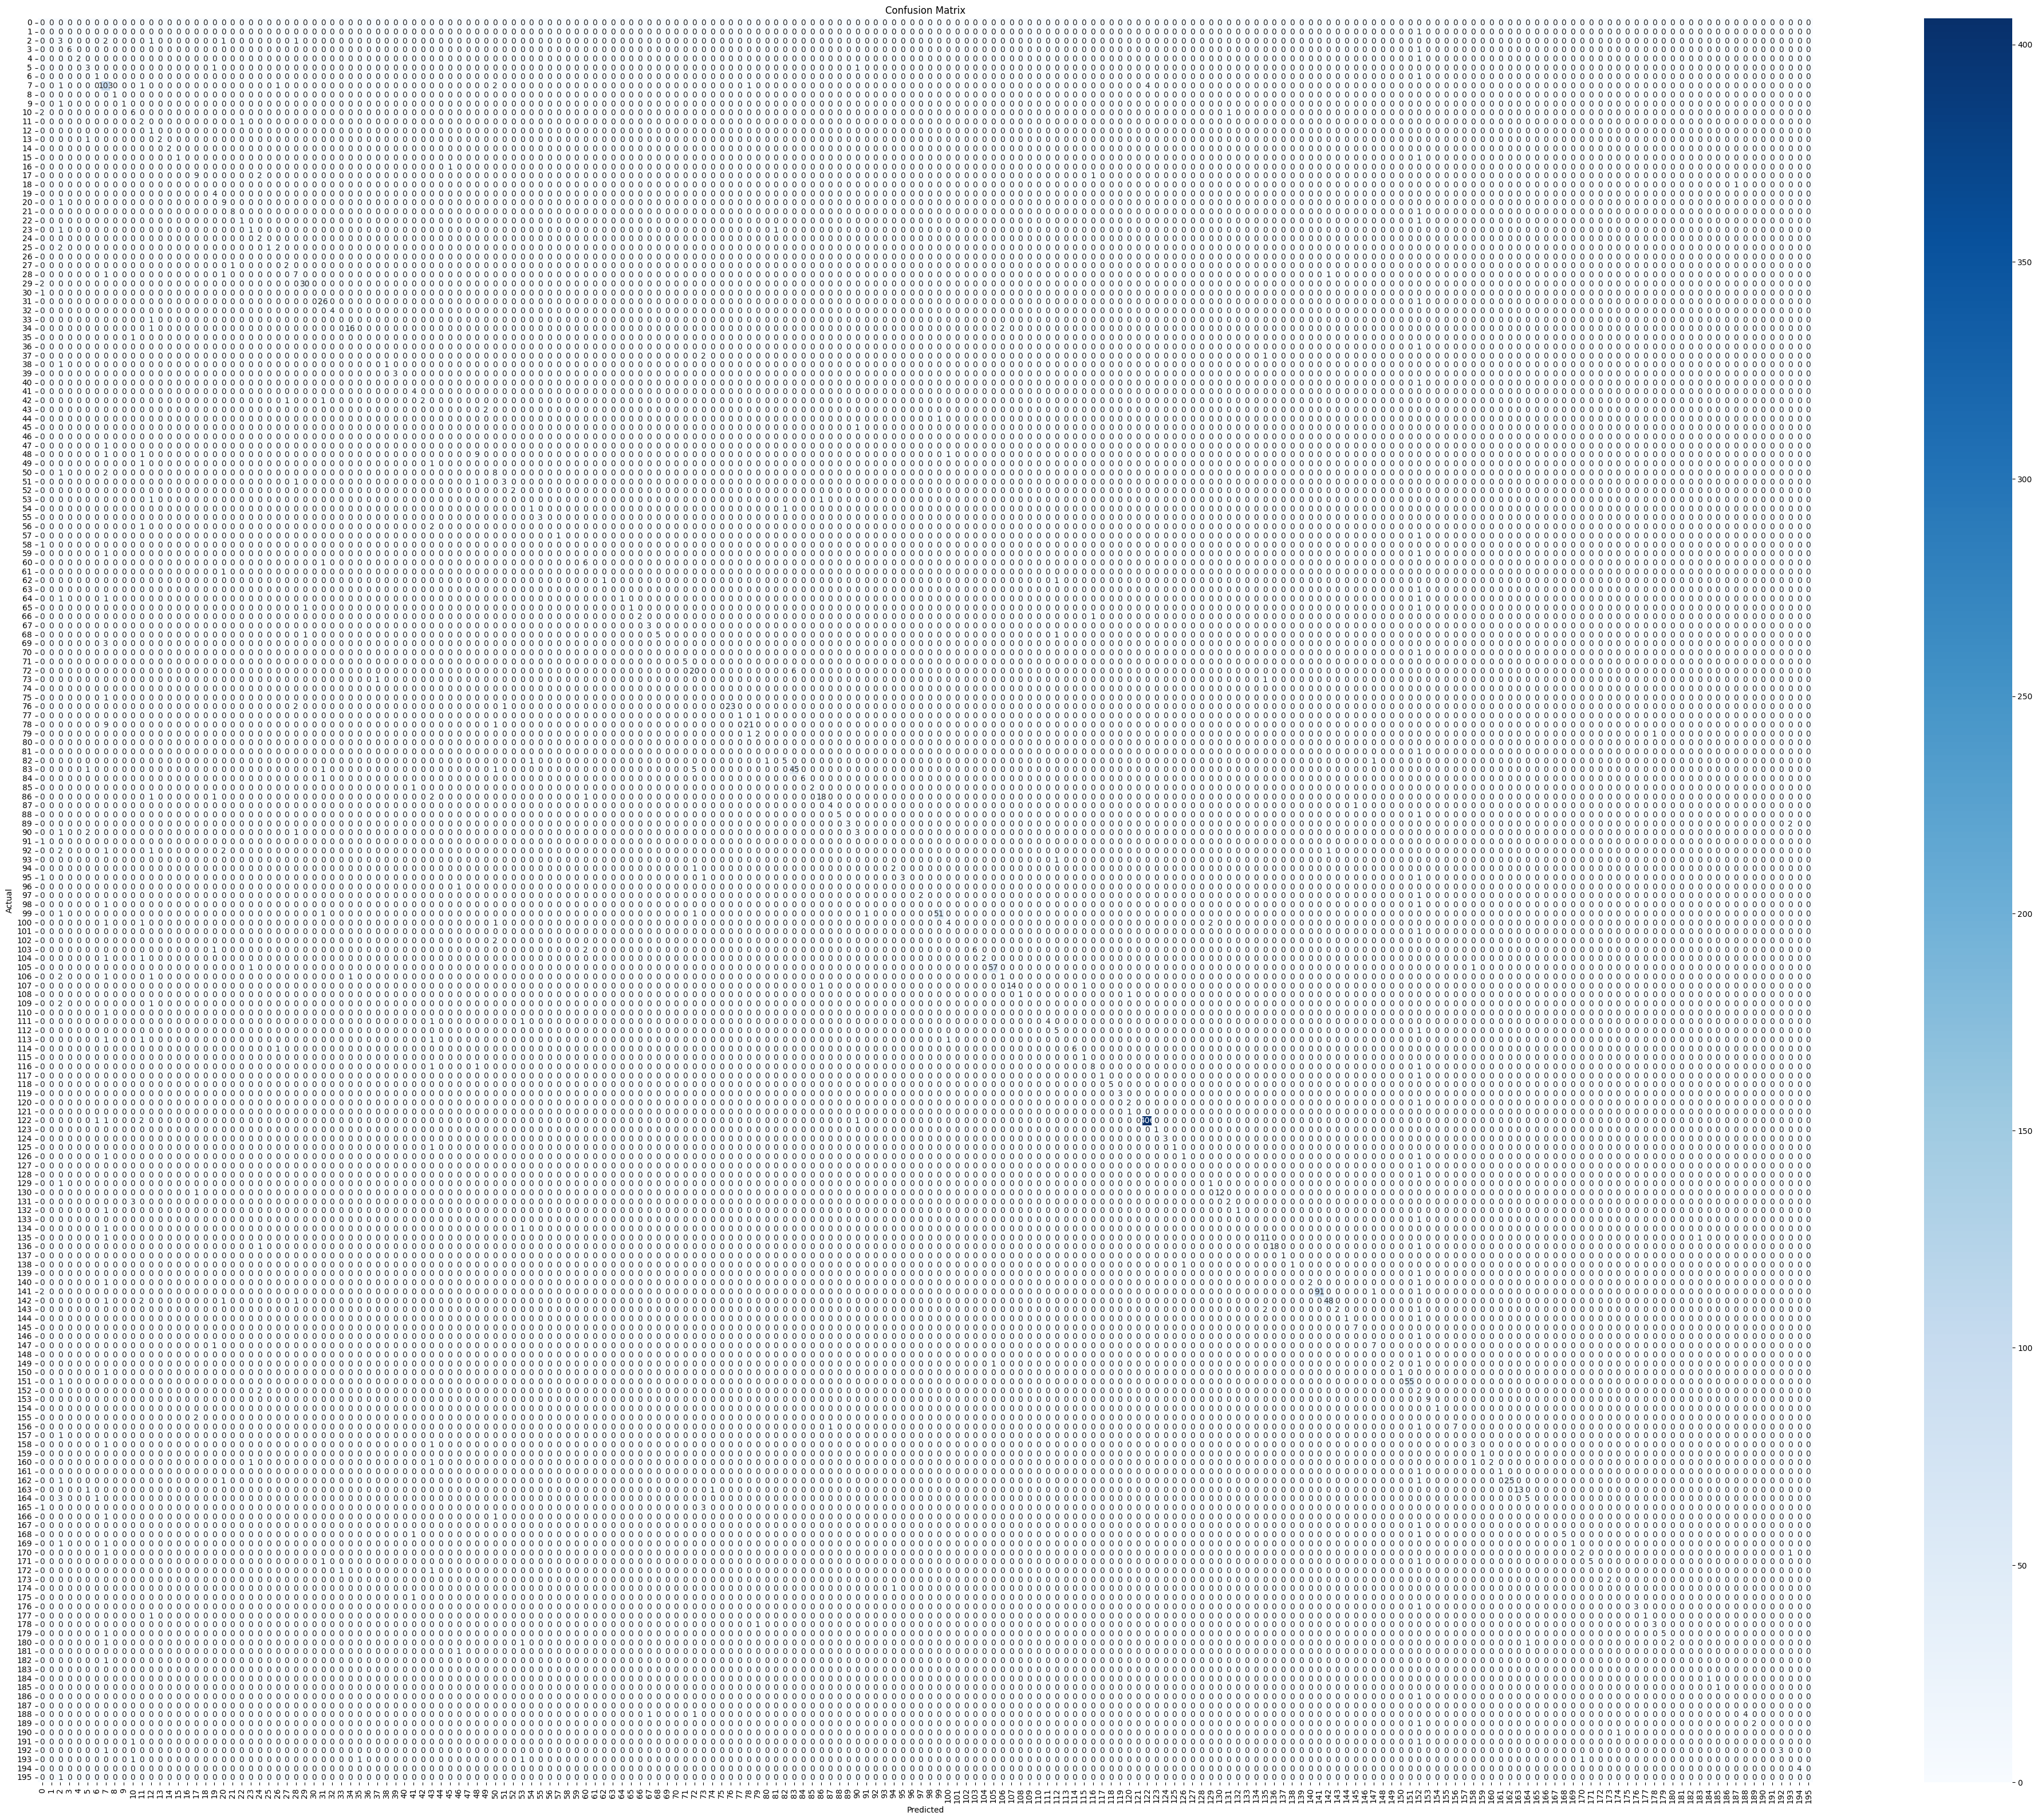

In [23]:
conf_mat = confusion_matrix(y_test, y_predict1)
plt.figure(figsize=(50,40))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
cr1 = classification_report(y_test, y_predict1)
print("\nClassification Report : ")
print(cr1)


Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.10      0.38      0.16         8
           5       1.00      0.86      0.92         7
           7       1.00      0.67      0.80         3
          11       0.38      0.60      0.46         5
          14       0.33      0.50      0.40         2
          15       0.70      0.91      0.79       113
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          18       0.50      0.67      0.57         9
          19       0.15      0.67      0.25         3
          20       0.10      1.00      0.18         1
          21       1.00      0.67      0.80         3
          24       1.00      1.00      1.00         2
          26       1.00      0.50      0.67         2
          27       0.00      0.00      0.00         1
 

In [25]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [26]:
y_predict2 = model2.predict(X_test)
ac2 = accuracy_score(y_test, y_predict2)
print("Accuracy : ",ac2*100)


Accuracy :  90.77532541029994


In [27]:
cr2 = classification_report(y_test, y_predict2)
print("\nClassification Report : ")
print(cr2)


Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       1.00      0.38      0.55         8
           5       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         0
          11       0.75      0.60      0.67         5
          14       1.00      1.00      1.00         2
          15       0.99      0.95      0.97       113
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          18       1.00      0.78      0.88         9
          19       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         3
          24       1.00      1.00      1.00         2
          26       1.00      1.00      1.00         2
 

In [28]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_predict3 = model3.predict(X_test)
ac3 = accuracy_score(y_test, y_predict3)
print("Accuracy : ", ac3*100)

Accuracy :  88.62478777589135


In [30]:
cr3 = classification_report(y_test, y_predict3)
print("\nClassification Report : ")
print(cr3)


Classification Report : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       1.00      0.38      0.55         8
           5       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         3
          11       0.75      0.60      0.67         5
          14       1.00      1.00      1.00         2
          15       0.82      0.94      0.87       113
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          18       0.90      1.00      0.95         9
          19       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         3
          24       1.00      1.00      1.00         2
          26       1.00      1.00      1.00         2
          27       0.00      0.00      0.00         1
          29       0.85      0.92      0.88        12
 

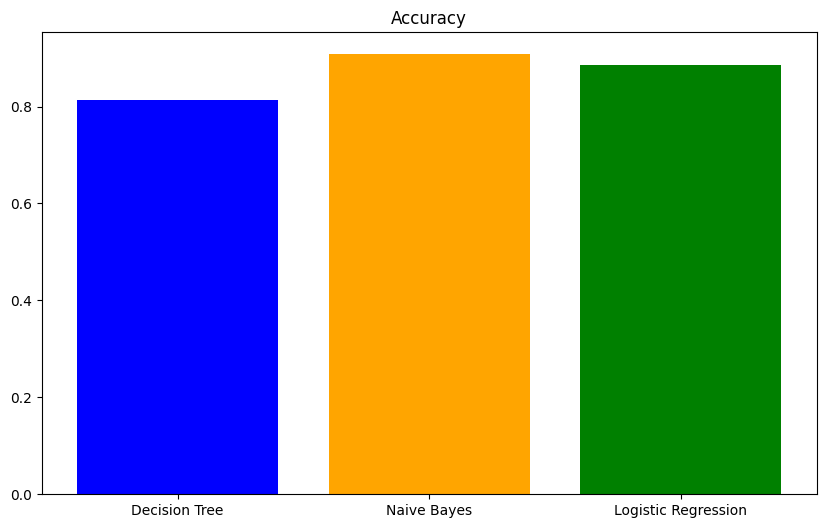

In [31]:
data1 = {
    'Model': ['Decision Tree',  'Naive Bayes','Logistic Regression'],
    'Accuracy': [ac1, ac2, ac3]
}
colors = ['blue', 'orange', 'green']
dn = pd.DataFrame(data1)

plt.figure(figsize=(10, 6))

plt.bar(dn['Model'], dn['Accuracy'],color=colors)
plt.title('Accuracy')

plt.show()


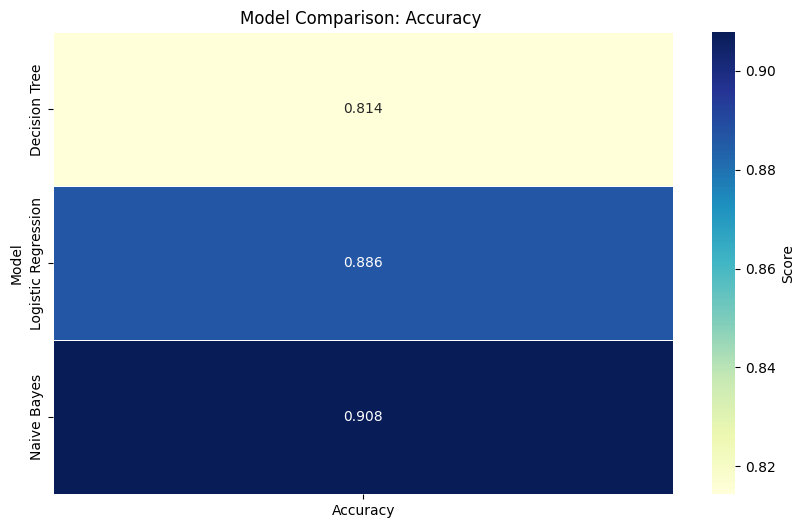

In [32]:
dn = pd.DataFrame(data1)
heatmap_data = pd.pivot_table(dn, values=['Accuracy'], index='Model')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5, fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Model Comparison: Accuracy ')
plt.show()

In [33]:
from google.colab import files
uploaded = files.upload()

Saving medicine.csv to medicine (1).csv


In [34]:
doc_data = pd.read_csv("medicine (1).csv",encoding='latin1', names=['label_dis','Drug'])

In [35]:
doc_data

,label_dis,Drug
0,Abscess,Babul Kikar
1,Acquired Capillary Haemangioma of Eyelid,Kanchnaar Guggul
2,Acquired Immuno Deficiency Syndrome,Shatavari
3,Acute encephalitis syndrome,Shadanga Paniya
4,Adult Inclusion Conjunctivitis,Daru Haldi
...,...,...
256,Yaws,Azithromycin
257,Yellow Fever,Nirogam Immuno
258,Zika virus disease,Giloy
259,lactose intolerance,Bilva


In [36]:
test_col = [col for col in data.columns if col != 'label_dis']
def predict_disease():

    symptoms = input("Enter your symptoms separated by commas: ").split(',')
    test_data = {col: 1 if col in symptoms else 0 for col in test_col}
    test_df = pd.DataFrame(test_data, index=[0])

    print("Prediction in progress...\n")
    dt = label.inverse_transform(model1.predict(test_df))
    nb = label.inverse_transform(model2.predict(test_df))
    lr = label.inverse_transform(model3.predict(test_df))



    result_dt = pd.DataFrame({"label_dis": dt})
    result_dt = result_dt.merge(doc_data, on='label_dis', how='left')

    result_nb = pd.DataFrame({"label_dis": nb})
    result_nb = result_nb.merge(doc_data, on='label_dis', how='left')


    result_lr = pd.DataFrame({"label_dis": lr})
    result_lr = result_lr.merge(doc_data, on='label_dis', how='left')

    return result_dt, result_nb, result_lr

In [37]:
result_dt, result_nb,result_lr = predict_disease()
print("Decision Tree Results:")
print(result_dt,"\n")
print("\nNaive Bayes Results: \n")
print(result_nb,"\n")

print("\nLogistic Regression Results:")
print(result_lr,"\n")

Enter your symptoms separated by commas: Cough, fever, headache
Prediction in progress...

Decision Tree Results:
              label_dis             Drug
0  Raynaud's Phenomenon  Samana Chikitsa 


Naive Bayes Results: 

   label_dis             Drug
0  Taeniasis  Mahashankh Vati 


Logistic Regression Results:
                              label_dis       Drug
0  Myocardial Infarction (Heart Attack)  Triphala  

